$\huge{\color{red}{\text{Connecticut District Learning Models,}}}$ 
<br>
<br>

In [1]:

import pandas
import numpy as np
from sodapy import Socrata
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

***
<br>
<br>

$\huge{\color{blue}{\text{Fetch Table from CT DPH}}}$

In [2]:

client = Socrata("data.ct.gov", None)

results = client.get("5q7h-u2ac", limit=20000)

# Convert to pandas DataFrame
results_df = pandas.DataFrame.from_records(results)    
    
results_df[0:3]

,district_code,district_name,grades_inperson_model,grades_hybrid_model,grades_remote_model,predominant_model,organization_type,reporting_period,update_date,alliance_district,school_start_date,percent_students_fully_remote,total_number_students
0,0010011,Andover School District,"PK, K, g1, g2, g3, g4, g5, g6",N/A,N/A,Most/All Grades Fully In-Person,Public School Districts,"February 1, 2021 - February 5, 2021",2021-02-09T00:00:00.000,NaN,NaN,NaN,NaN
1,0020011,Ansonia School District,"PK, K, g1, g2, g3, g4, g5, g6, g7, g8, g9, g10...",N/A,N/A,Most/All Grades Fully In-Person,Public School Districts,"February 1, 2021 - February 5, 2021",2021-02-09T00:00:00.000,Alliance,NaN,NaN,NaN
2,0030011,Ashford School District,"PK, K, g1, g2, g3, g4, g5, g6, g7, g8",N/A,N/A,Most/All Grades Fully In-Person,Public School Districts,"February 1, 2021 - February 5, 2021",2021-02-09T00:00:00.000,NaN,NaN,NaN,NaN


$\huge{\color{blue}{\text{Predominant Model to 1,0}}}$

In [3]:
results_df = results_df.drop(['district_code', 'school_start_date', 'percent_students_fully_remote', 'total_number_students'], axis=1)
results_df['remote'] = np.where(results_df['predominant_model']=='Most/All Grades Fully Remote', 1, 0)
results_df[0:3]

,district_name,grades_inperson_model,grades_hybrid_model,grades_remote_model,predominant_model,organization_type,reporting_period,update_date,alliance_district,remote
0,Andover School District,"PK, K, g1, g2, g3, g4, g5, g6",N/A,N/A,Most/All Grades Fully In-Person,Public School Districts,"February 1, 2021 - February 5, 2021",2021-02-09T00:00:00.000,NaN,0
1,Ansonia School District,"PK, K, g1, g2, g3, g4, g5, g6, g7, g8, g9, g10...",N/A,N/A,Most/All Grades Fully In-Person,Public School Districts,"February 1, 2021 - February 5, 2021",2021-02-09T00:00:00.000,Alliance,0
2,Ashford School District,"PK, K, g1, g2, g3, g4, g5, g6, g7, g8",N/A,N/A,Most/All Grades Fully In-Person,Public School Districts,"February 1, 2021 - February 5, 2021",2021-02-09T00:00:00.000,NaN,0


In [4]:
results_df['remote_num'] = results_df.grades_remote_model.apply(lambda x: len(x.split(',')))
results_df['hybrid_num'] = results_df.grades_hybrid_model.apply(lambda x: len(x.split(',')))
results_df['inperson_num'] = results_df.grades_inperson_model.apply(lambda x: len(x.split(',')))

In [5]:
#results_df['R'] = results_df.apply(lambda x: 'R' if x[10] > x[11] and x[10] > x[12] else ' ', axis=1)
#results_df['H'] = results_df.apply(lambda x: 'H' if x[11] > x[10] and x[11] > x[12] else ' ', axis=1)
#results_df['I'] = results_df.apply(lambda x: 'I' if x[12] > x[11] and x[12] > x[10] else ' ', axis=1)
#results_df['predom'] = results_df['R'] + results_df['H'] + results_df['I']
results_df['R'] = results_df.apply(lambda x: 1.0 if x[10] > x[11] and x[10] > x[12] else 0, axis=1)
results_df['H'] = results_df.apply(lambda x: 2.0 if x[11] > x[10] and x[11] > x[12] else 0, axis=1)
results_df['I'] = results_df.apply(lambda x: 3.0 if x[12] > x[10] and x[12] > x[11] else 0, axis=1)
results_df['predom'] = results_df[["R", "H", "I"]].max(axis=1)

In [6]:
temp_df = results_df[results_df.organization_type == 'Public School Districts']
temp_df['city'] = temp_df['district_name'].str.replace(' School District', ', CT')
temp_df[0:10]
#temp_df.to_csv("learning_models.csv")

,district_name,grades_inperson_model,grades_hybrid_model,grades_remote_model,predominant_model,organization_type,reporting_period,update_date,alliance_district,remote,remote_num,hybrid_num,inperson_num,R,H,I,predom,city
0,Andover School District,"PK, K, g1, g2, g3, g4, g5, g6",N/A,N/A,Most/All Grades Fully In-Person,Public School Districts,"February 1, 2021 - February 5, 2021",2021-02-09T00:00:00.000,NaN,0,1,1,8,0.0,0.0,3.0,3.0,"Andover, CT"
1,Ansonia School District,"PK, K, g1, g2, g3, g4, g5, g6, g7, g8, g9, g10...",N/A,N/A,Most/All Grades Fully In-Person,Public School Districts,"February 1, 2021 - February 5, 2021",2021-02-09T00:00:00.000,Alliance,0,1,1,14,0.0,0.0,3.0,3.0,"Ansonia, CT"
2,Ashford School District,"PK, K, g1, g2, g3, g4, g5, g6, g7, g8",N/A,N/A,Most/All Grades Fully In-Person,Public School Districts,"February 1, 2021 - February 5, 2021",2021-02-09T00:00:00.000,NaN,0,1,1,10,0.0,0.0,3.0,3.0,"Ashford, CT"
3,Avon School District,"PK, K, g1, g2, g3, g4, g5, g6, g7, g8",N/A,"g9, g10, g11, g12",Most/All Grades Fully In-Person,Public School Districts,"February 1, 2021 - February 5, 2021",2021-02-09T00:00:00.000,NaN,0,4,1,10,0.0,0.0,3.0,3.0,"Avon, CT"
6,Barkhamsted School District,"K, g1, g2, g3, g4, g5, g6",N/A,N/A,Most/All Grades Fully In-Person,Public School Districts,"February 1, 2021 - February 5, 2021",2021-02-09T00:00:00.000,NaN,0,1,1,7,0.0,0.0,3.0,3.0,"Barkhamsted, CT"
7,Berlin School District,"PK, K, g1, g2, g3, g4, g5","g6, g7, g8, g9, g10, g11, g12",N/A,Most/All Grades Fully In-Person,Public School Districts,"February 1, 2021 - February 5, 2021",2021-02-09T00:00:00.000,NaN,0,1,7,7,0.0,0.0,0.0,0.0,"Berlin, CT"
8,Bethany School District,"PK, K, g1, g2, g3, g4, g5, g6",N/A,N/A,Most/All Grades Fully In-Person,Public School Districts,"February 1, 2021 - February 5, 2021",2021-02-09T00:00:00.000,NaN,0,1,1,8,0.0,0.0,3.0,3.0,"Bethany, CT"
9,Bethel School District,"PK, K, g1, g2, g3, g4, g5, g6, g7, g8","g9, g10, g11, g12",N/A,Most/All Grades Fully In-Person,Public School Districts,"February 1, 2021 - February 5, 2021",2021-02-09T00:00:00.000,NaN,0,1,4,10,0.0,0.0,3.0,3.0,"Bethel, CT"
11,Bloomfield School District,PK,"K, g1, g2, g3, g4, g5, g6, g7, g8, g9, g10, g1...",N/A,Most/All Grades Hybrid,Public School Districts,"February 1, 2021 - February 5, 2021",2021-02-09T00:00:00.000,Alliance,0,1,13,1,0.0,2.0,0.0,2.0,"Bloomfield, CT"
12,Bolton School District,"K, g1, g2, g3, g4, g5","PK, g6, g7, g8, g9, g10, g11, g12",N/A,Most/All Grades Hybrid,Public School Districts,"February 1, 2021 - February 5, 2021",2021-02-09T00:00:00.000,NaN,0,1,8,6,0.0,2.0,0.0,2.0,"Bolton, CT"


$\huge{\color{blue}{\text{Select Districts}}}$


In [7]:
urban_df = results_df.dropna(subset=["alliance_district"])
#urban_df = results_df[results_df.alliance_district.isnull()]
#urban_df = urban_df[urban_df.organization_type == 'Public Charter School Districts']
urban_df[urban_df.district_name == "Norwalk School District"]


,district_name,grades_inperson_model,grades_hybrid_model,grades_remote_model,predominant_model,organization_type,reporting_period,update_date,alliance_district,remote,remote_num,hybrid_num,inperson_num,R,H,I,predom
147,Norwalk School District,"PK, K, g1, g2, g3, g4, g5","g6, g7, g8, g9, g10, g11, g12",N/A,Most/All Grades Fully In-Person,Public School Districts,"February 1, 2021 - February 5, 2021",2021-02-09T00:00:00.000,Alliance,0,1,7,7,0.0,0.0,0.0,0.0
432,Norwalk School District,"PK, K, g1, g2, g3, g4, g5","g6, g7, g8, g9, g10, g11, g12",N/A,Most/All Grades Fully In-Person,Public School Districts,"January 25, 2021 - January 29, 2021",2021-02-03T00:00:00.000,Alliance,0,1,7,7,0.0,0.0,0.0,0.0
717,Norwalk School District,"PK, K, g1, g2, g3, g4, g5","g6, g7, g8, g9, g10, g11, g12",N/A,Most/All Grades Fully In-Person,Public School Districts,"January 18, 2021 - January 22, 2021",2021-01-27T00:00:00.000,Alliance,0,1,7,7,0.0,0.0,0.0,0.0
1002,Norwalk School District,"PK, K, g1, g2, g3, g4, g5","g6, g7, g8, g9, g10, g11, g12",N/A,Most/All Grades Fully In-Person,Public School Districts,"January 11, 2021 - January 15, 2021",2021-01-19T00:00:00.000,Alliance,0,1,7,7,0.0,0.0,0.0,0.0
1287,Norwalk School District,"PK, K, g1, g2, g3, g4, g5","g6, g7, g8, g9, g10, g11, g12",N/A,Most/All Grades Fully In-Person,Public School Districts,"January 4, 2021 - January 8, 2021",2021-01-12T00:00:00.000,Alliance,0,1,7,7,0.0,0.0,0.0,0.0
1572,Norwalk School District,"PK, K, g1, g2, g3, g4, g5","g6, g7, g8, g9, g10, g11, g12",N/A,Most/All Grades Fully In-Person,Public School Districts,"December 14, 2020 - December 18, 2020",2020-12-23T00:00:00.000,Alliance,0,1,7,7,0.0,0.0,0.0,0.0
1857,Norwalk School District,"PK, K, g1, g2, g3, g4, g5","g6, g7, g8, g9, g10, g11, g12",N/A,Most/All Grades Fully In-Person,Public School Districts,"December 7, 2020 - December 11, 2020",2020-12-16T00:00:00.000,Alliance,0,1,7,7,0.0,0.0,0.0,0.0
2142,Norwalk School District,"PK, K, g1, g2, g3, g4, g5","g6, g7, g8, g9, g10, g11, g12",N/A,Most/All Grades Fully In-Person,Public School Districts,"November 30, 2020 - December 4, 2020",2020-12-09T00:00:00.000,Alliance,0,1,7,7,0.0,0.0,0.0,0.0
2427,Norwalk School District,"PK, K, g1, g2, g3, g4, g5","g6, g7, g8, g9, g10, g11, g12",N/A,Most Grades Fully In-Person,Public School Districts,"November 16, 2020 - November 20, 2020",2020-11-25T00:00:00.000,Alliance,0,1,7,7,0.0,0.0,0.0,0.0
2712,Norwalk School District,"PK, K, g1, g2, g3, g4, g5","g6, g7, g8, g9, g10, g11, g12",N/A,NaN,Public School Districts,"November 9, 2020 - November 13, 2020",2020-11-19T00:00:00.000,Alliance,0,1,7,7,0.0,0.0,0.0,0.0


In [8]:
districtlist = urban_df.district_name.unique().tolist()
districtlist

['Ansonia School District',
 'Bloomfield School District',
 'Bridgeport School District',
 'Bristol School District',
 'Danbury School District',
 'Derby School District',
 'East Hartford School District',
 'East Haven School District',
 'East Windsor School District',
 'Groton School District',
 'Hamden School District',
 'Hartford School District',
 'Killingly School District',
 'Manchester School District',
 'Meriden School District',
 'Middletown School District',
 'Naugatuck School District',
 'New Britain School District',
 'New Haven School District',
 'New London School District',
 'Norwalk School District',
 'Norwich School District',
 'Putnam School District',
 'Stamford School District',
 'Thompson School District',
 'Torrington School District',
 'Vernon School District',
 'Waterbury School District',
 'West Haven School District',
 'Winchester School District',
 'Windham School District',
 'Windsor School District',
 'Windsor Locks School District']

In [9]:
bport_df = urban_df[urban_df['district_name'] == 'Bridgeport School District'].sort_values(by='update_date')
#bport_df

In [10]:
datalist = []
for district in districtlist:
    df = urban_df[urban_df['district_name'] == district].sort_values(by='update_date')
    datalist.append(df['predom'].tolist())
data = np.array(datalist)
#data

In [11]:
labels = []
for district in districtlist:
    labels.append(district.replace(' School District', ''))
labels

['Ansonia',
 'Bloomfield',
 'Bridgeport',
 'Bristol',
 'Danbury',
 'Derby',
 'East Hartford',
 'East Haven',
 'East Windsor',
 'Groton',
 'Hamden',
 'Hartford',
 'Killingly',
 'Manchester',
 'Meriden',
 'Middletown',
 'Naugatuck',
 'New Britain',
 'New Haven',
 'New London',
 'Norwalk',
 'Norwich',
 'Putnam',
 'Stamford',
 'Thompson',
 'Torrington',
 'Vernon',
 'Waterbury',
 'West Haven',
 'Winchester',
 'Windham',
 'Windsor',
 'Windsor Locks']

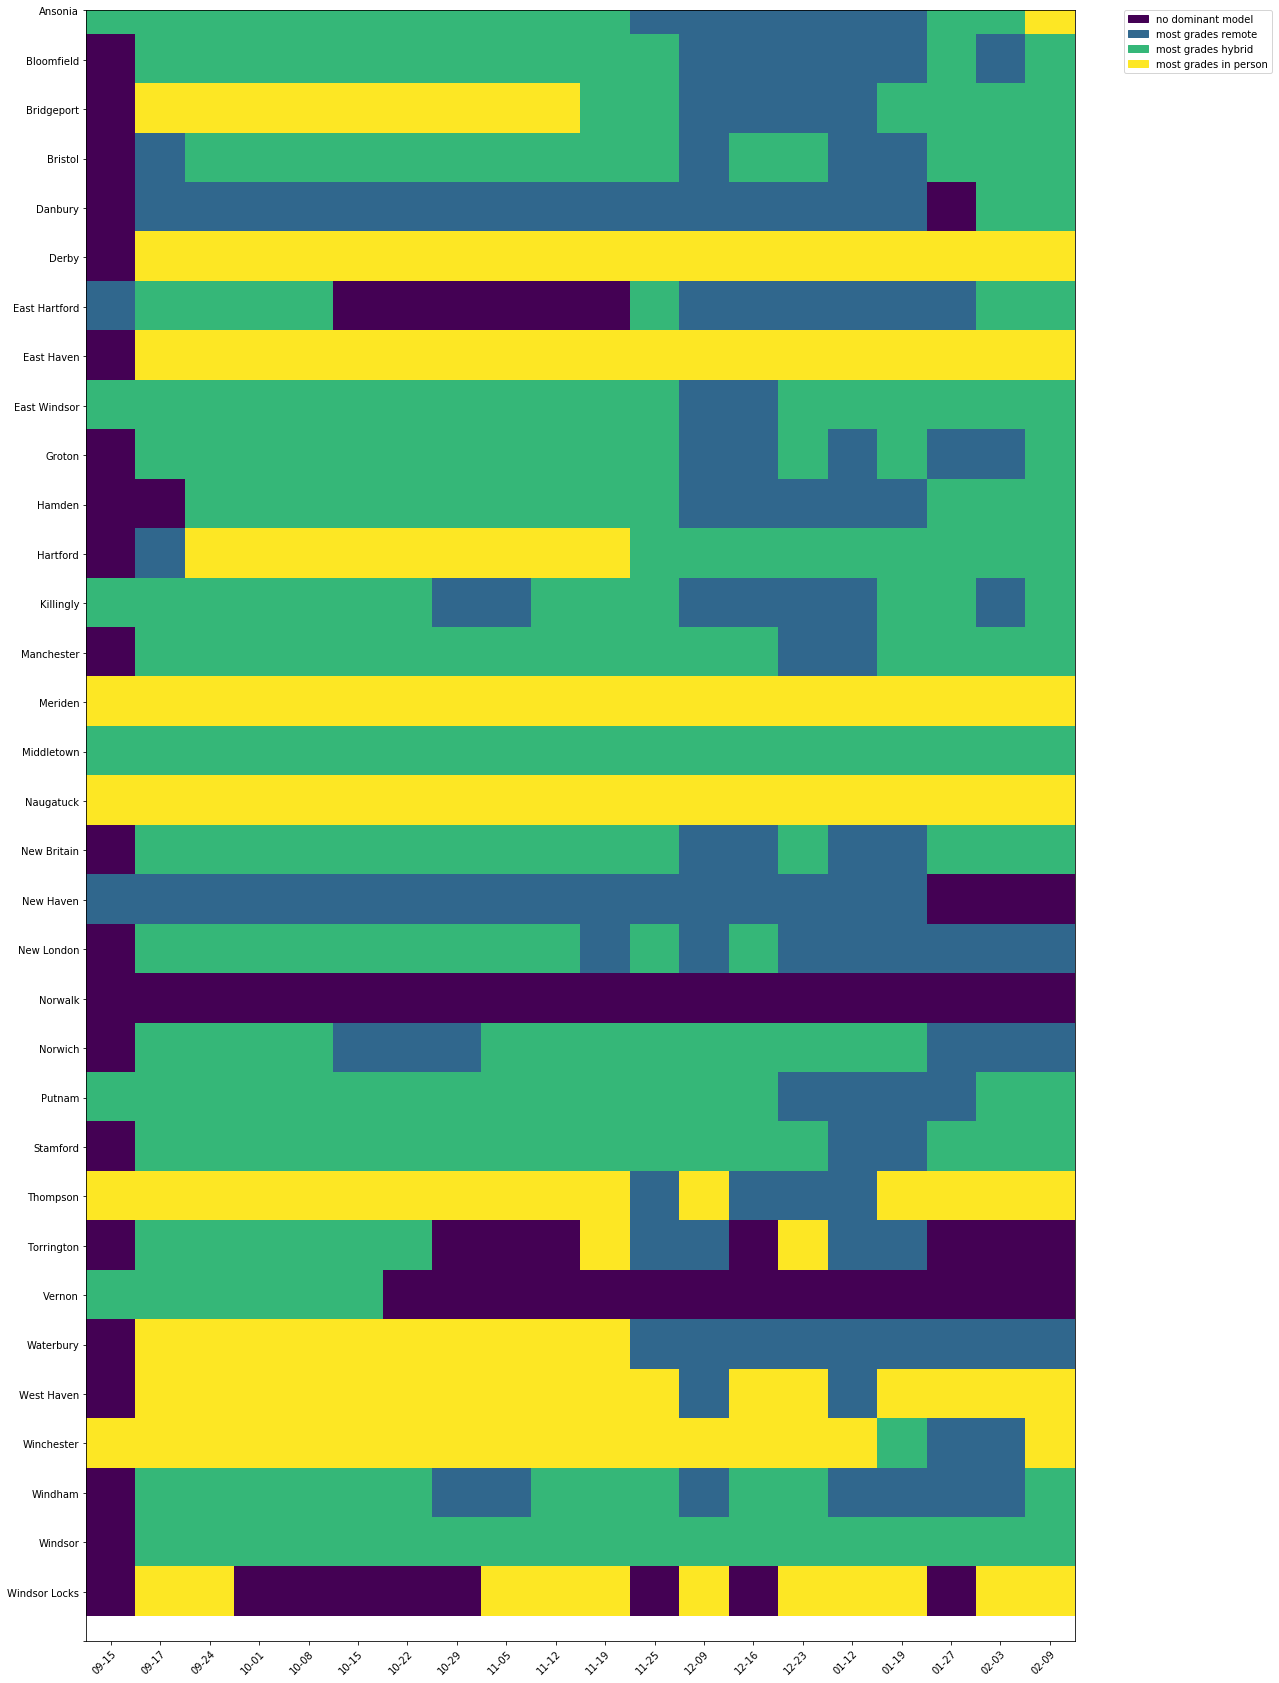

In [20]:
fig, ax = plt.subplots(figsize=(30,30))
#data = np.array([bport_df['predom'].tolist()])

weeks = []
for week in bport_df['update_date'].tolist():
    weeks.append(week[5:10])

#districtlist = districtlist.insert(0, ' ')
    
im = ax.imshow(data)
ax.set_xticks(np.arange(len(weeks)))
ax.set_yticks(np.arange(len(labels)+1))
ax.set_xticklabels(weeks)
ax.set_yticklabels(labels)
plt.setp(ax.get_xticklabels(), rotation=45, size = 10, ha="right",
         rotation_mode="anchor")

#name = bport_df['district_name'].mode()[0]
#ax.set_title(name)
#plt.legend(bbox_to_anchor=(1,1), loc="lower right")

values = np.unique(data.ravel())
colors = [ im.cmap(im.norm(value)) for value in values]
# create a patch (proxy artist) for every color 
import matplotlib.patches as mpatches
models = ['no dominant model', 'most grades remote', 'most grades hybrid', 'most grades in person']
patches = [ mpatches.Patch(color=colors[i], label="{l}".format(l=models[i]) ) for i in range(len(models)) ]
# put those patched as legend-handles into the legend
plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0. )


#fig.tight_layout()
plt.savefig('alliance.png')
plt.show()